# COGS 108 - Music Artist Collaboration

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs)).

* [  ] YES - make available
* [`X`] NO - keep private

# Names

- Misha Tavera
- Matthew Paoletta
- Jun-Hee Hwang
- Will Lang

# Abstract

We chose to look at the various factors that lead to artists collaborating in music. We were curious to find what is the leading factor that makes people come together to colloboration, and in this case we chose to specifically look at the music artists. To do this we look at the leading factors that we hypothesized might lead to artists collaboration, those being demographic factors (age, nationality, and gender) as well as artist popularity, and finally an artists musical style. Among these factors we wanted to establish which leads the way as a predicter of music artists collaborating. 

To achieve this we gathered a combination of datasets to compare each of these factors against one another. More specifically, we created a model of a support vector machine to conduct this analysis. Once we trained models on each of the three categories of features we outlined, we compared how accurate their predicted collaborations were compared to actual collaboration patterns. In the end, our analysis suggested that demographic information was slightly stronger at predicting artist collaborations compared to both popularity and musical style. However, all three categories of factors ultimately had fairly similar accuracy levels in the 50%-60% range.

# Research Question

What factor is the strongest predictors of whether or not a set of music artists would collaborate? Between the artist(s)'s demographic information (age, gender, nationality), popularity (listeners on last.fm), and their musical attributes (genre, danceability), which type of factor is more impactful? What contributes more: the artist's background, fame, or the music they create?


## Background and Prior Work

Collaboration between artists is something that has become very popular in recent years. Whether that is composing the music, writing the songs, or artists performing collaboratively we see many instances of this in today’s music industry. Collaboration between artists often opens their music to wider audiences, serving as a way to increase an artist's exposure while also creating new and unique approaches to music. The effects of collaboration are often analyzed, however, here we hope to explore the features that lead to collaboration in the first place. Understanding these features will give us insight into what factors influence collaboration and what is their predictability.

There are many factors that might contribute to the any given collaboration, and we would like to focus on an artist's demographic information, overall popularity, and musical style. For instance we often see frequent collaborations among the same genres, as we see in genres like Hip-Hop, where artist frequently make use of featured collaborations. Furthermore, other potential leading features of collaboration to consider would be demographic information, such as gender, nationality, and age. For example, we can consider how similarities in geographical region might lead for artist collaboration because of accessibility. And of course, having a similar level of popularity helps make potential collaborations more appealing. Analyzing these factors across these categories will assist us in identifying reliable predictors of artists collaboration.

There has been research done on the correlation between releasing collaborative songs and the artists' growth in popularity. It was found that there is a positive effect on an artist's popularity following the release of songs featuring other artists. Furthermore, analysis is done comparing economic and social capitals among other things, concluding that more successful collaborations occur between artists somewhat diverse from one another <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Other research perhaps helpful to ours includes Graph Attention Network modeling which is intended to be used to predict potential successful artist collaborations by weighing different features such as genre and artist popularity.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) Learning and building on previous research we can analyse demographics, popularity, and musical style data to identify the predicting factors of musical artists collaborating.


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Abhishek Deshmane and Victor Martinez-de-Albeniz, “Come Together, Right Now: An Empirical Study of Collaborations in the Music Industry,” SSRN Electronic Journal, 2020, https://doi.org/10.2139/ssrn.3743462.
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Jay Yu, “Re-Mix and Match!,” Medium, May 15, 2023, https://medium.com/stanford-cs224w/re-mix-and-match-829b187139b0.

# Hypothesis



We predict that artist popularity will be the strongest predictor of whether or not a set of music artists would collaborate. We think that a music artist's popularity says a lot about the particular audience of that artist, and for the sake of success it's in the artists' best interests to make their collaborative work appealing to each of their fanbases. For example, it's common to see two famous rappers collaborate on a song, but it would be surprising to see a pop star work with an underground indie band.

# Datasets

Here we outline our datasets, clarify variable definitions and sources, and detail our strategy for identifying artist collaborations—all in service of answering the core research question: 

**What type of factors, out of demographic, popularity, or musical style, is the strongest at predicting whether or not a set of music artists would collaborate?**

<br>
---

## 1. Spotify Tracks Dataset

- **Dataset Name:** Spotify Tracks Dataset  
- **Link to the dataset:** [Spotify Tracks Dataset](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)  
- **Observations:** 114,000  
- **Variables:** 21

### Overview of Columns

This dataset has numerous columns, but here we focus on the few that will actually be used in our analysis.

- **`artists`**  
  - **Definition:** Lists the performer(s) on each track.  
  - **Relevance:** This field is crucial for detecting collaborations. By parsing the string (or list) of artists, we can identify tracks with multiple performers and thereby construct an artist-to-artist collaboration network.

- **`danceability`**  
  - **Definition:**  A Number from 0 and 1 that takes into account a song's tempo, loudness, and other variables.
  - **Relevance:** This statistic is a numeric value that tells us loads of information about how a song sounds to the average user. By taking the average of danceability from an artist, we can get a numerical value of how danceable a discography is for a given artist.

- **`track_genre`**  
  - **Definition:** Label for the specific genre that the track belongs to.
  - **Relevance:** Eventually, the genre will be quantified for analysis, and the genre metric will be averaged across all tracks of a given artist when we eventually group by artist in this dataset.

---

## 2. Music Artists Popularity (Supplemental Dataset)

- **Dataset Name:** Music Artists Popularity  
- **Link to the dataset:** [Music Artists Popularity](https://www.kaggle.com/datasets/pieca111/music-artists-popularity)  
- **Observations:** 1,466,083  
- **Variables:** 10

### Overview of Columns

This dataset is only being used to retrieve the country of origin for the artists.

- **Artist Identifier/Name:**  
  - **Definition:** The music artist represented by the observation 
  - **Relevance:** Identification for merging with the Spotify Tracks dataset
  
- **`country_lastfm`**  
  - **Definition:** Gives the artist's country of origin.
  - **Relevance:** A key piece of demographic information to base our analyses on.

---

## 3. Artist Demographic Dataset

- **Dataset Name:** Artist Demographic  
- **Location:** Located under the data folder (detailed in *mistral.py*)  
- **Source:** Obtained from Mistral AI

### Content and Relevance

- **Information Provided:**  
  - Contains demographic details such as artist age, gender, and potentially nationality or race.
  
- **Role in Analysis:**  
  - These demographic variables are key to addressing the research question by allowing us to compare the influence of demographic versus artistic factors on collaborative behavior.
  - **Clarification:** While the Spotify and popularity datasets focus on artistic and market performance metrics, the demographic dataset fills the gap by providing personal background information that may also predict collaboration trends.

---

## 4. Collaboration Identification and Data Processing

### Identifying Collaborations

- **Methodology:**  
  - **Parsing the 'artists' Column:**  
    - Tracks where the 'artists' field contains multiple names will be flagged as collaborations.
  - **Data Frame Structure:**  
    - A dedicated collaboration data frame will be constructed with the following key components:
      - **Track ID:** Unique identifier from the Spotify Tracks dataset.
      - **Collaborating Artists:** A parsed list or pairwise breakdown of the artists involved.
      - **Aggregated Features:** Derived metrics (e.g., average popularity, mean audio feature scores) for the involved artists.
      
  - **Purpose:**  
    - This structure will serve as the basis for building an artist-to-artist network, facilitating further analyses on how artistic similarity and demographic factors relate to the frequency and nature of collaborations.

---

## 5. Connecting the Data to the Research Question

**Research Question:**  
*What factors are the strongest predictors of whether or not a set of music artists would collaborate? Between demographic information (age, gender, etc.) and artistic information (genre, popularity, etc.), which is more impactful? Or is it a combination of both?*

### Analytical Strategy

1. **Artist-Level Aggregation:**  
   - **From Spotify Tracks:**  
     - Aggregate artists' genres and track danceability to build detailed artist profiles.
   - **From Music Artists Popularity:**  
     - Incorporate artists' listener numbers to measure popularity as an analytical variable.
   - **From Artist Demographics:**  
     - Merge demographic data (e.g., age, gender) into the artist profiles to enable a comparative analysis.

2. **Modeling Collaborations:**  
   - **Similarity Metrics:**  
     - Compute similarity scores (e.g., cosine similarity) between artist profiles.
   - **Predictive Modeling:**  
     - Develop models (logistic regression, random forests, etc.) to predict whether a pair of artists will collaborate based on the aggregated features.
   - **Feature Importance:**  
     - Use analyses such as permutation importance or SHAP values to quantify the contribution of artistic versus demographic factors in predicting collaborations.or.
       

# Setup

In [25]:
import pandas as pd
import re
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

# Data Cleaning

## Spotify Tracks Dataset

First we load the Spotify Tracks Dataset to use as a starting point. Ultimately we will be interested in the column for with the artist names for identification of observations, and we will use the genre and danceability columns as our musical style variables. Thus, the first step is to explode the dataset by the 'artist' column so that we can treat the artists as observations rather than the tracks, since our research question pertains to artists. Note that any artist with nan values are simply unusable in our analysis since we must have definitive information in our outlined categories in order to properly compare the collaborations or lack thereof of all the artists.

In [2]:
tracks = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# identify missing values
tracks.dropna(inplace=True)

# explode by 'artist'
tracks['artists'] = tracks['artists'].apply(lambda x: x.split(';'))
tracks = tracks.explode('artists')

## Music Artists Popularity

Next we will load the Music Artists Popularity dataset, from which we will ultimately retrieve the 'country_lastfm' column in order to track an artist's number of listeners tracked on lastfm as a means to measure their overall popularity.

In [3]:
artists = pd.read_csv('data/artists.csv', low_memory=False)

# identify nan values
artists.dropna(subset = ['artist_mb'], inplace=True)

## Artist Demographic Dataset

Now we read in our dataset which compiles all demographic information on our artists that we scraped from the web.

In [4]:
demo = pd.read_csv('data/artists_demographics.csv', low_memory=False)[['artist', 'gender', 'age']].dropna(subset=['artist'])
demo['gender'] = demo.gender.fillna('groups').apply(lambda x: x.lower() if x.lower() in ['male', 'female', 'non-binary'] else 'groups')
def clean_age(x):
    if 'deceased' in x: 
        return 'deceased'
    elif '-' in x:
        return x
    num = "".join(re.findall(r"\d", x))
    if len(num) == 0:
        num = 'unknown'
    elif int(num) > 100:
        num = 'deceased'
    else: 
        num = int(num)
    return num
demo['age'] = demo.age.fillna('unknown').apply(clean_age)

## Final Dataset - Putting it all together

With all three datasets individually read in, we are now ready to combine them into one comprehensive dataset with all three categories of information: demographic, popularity, and musical style. We start by merging the Spotify Tracks and Music Artist Popularity datasets by artist name, and we proceed to keep only the already outlined columns we are interested in. All other columns are dropped.

In [5]:
artists['artist'] = artists.artist_mb.apply(lambda x: x.lower().replace(' ', ''))
tracks['artist'] = tracks.artists.apply(lambda x: x.lower().replace(' ', ''))

artists_tracks = tracks.merge(artists, on='artist', how='inner')
# drop unnecessary columns
artists_tracks['country'] = artists_tracks['country_mb'].fillna(artists_tracks['country_lastfm'])
artists_tracks['tags'] = artists_tracks['tags_mb'].fillna(artists_tracks['tags_lastfm'])
artists_tracks.drop(
    ['Unnamed: 0', 'album_name', 'artist', 'artist_mb', 'artist_lastfm',
     'scrobbles_lastfm', 'country_mb', 'country_lastfm', 'tags_mb',
     'tags_lastfm'], 
    axis=1, inplace=True
)

# drop nan values
artists_tracks.dropna(subset=['country', 'tags', 'listeners_lastfm'], inplace = True)
artists_tracks.isna().sum().sum()

artists_final = artists_tracks.merge(demo, left_on='artists', right_on='artist', how='left').drop(['artist'], axis=1)
artists_final = artists_final.fillna('unknown')

artists_final.head()

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,tempo,time_signature,track_genre,mbid,listeners_lastfm,ambiguous_artist,country,tags,gender,age
0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,...,77.489,4,acoustic,8a095d79-4d41-49a9-a45e-e3cc80813eef,8708.0,False,United States,indie; rock; christian; under 2000 listeners; ...,male,38
1,1pG5nd6gmfbMwUfT5shDQe,Ben Woodward,When the Party's over (Acoustic Piano),51,195945,False,0.619,0.226,4,-13.453,...,124.960,3,acoustic,8a095d79-4d41-49a9-a45e-e3cc80813eef,8708.0,False,United States,indie; rock; christian; under 2000 listeners; ...,male,38
2,7bhHLZxkRekrNPPkEdDTbn,Ben Woodward,Believer (Remix),42,204480,False,0.585,0.724,1,-6.513,...,187.484,3,acoustic,8a095d79-4d41-49a9-a45e-e3cc80813eef,8708.0,False,United States,indie; rock; christian; under 2000 listeners; ...,male,38
3,14BMBNRzv24eG6OKoIgPfP,Ben Woodward,Bulletproof,39,207677,False,0.590,0.552,7,-10.496,...,155.101,5,acoustic,8a095d79-4d41-49a9-a45e-e3cc80813eef,8708.0,False,United States,indie; rock; christian; under 2000 listeners; ...,male,38
4,0Pi3Ua6fJV1Yx5MGXhfybT,Ben Woodward,Call You Mine (Acoustic Piano),40,209554,False,0.733,0.297,5,-14.452,...,103.953,4,acoustic,8a095d79-4d41-49a9-a45e-e3cc80813eef,8708.0,False,United States,indie; rock; christian; under 2000 listeners; ...,male,38


# Data Analysis & Results

### Data and Preprocessing
The dataset used contains separate CSV files detailing artists' demographic information (`demographic.csv`), popularity (`popularity.csv`), and musical style (`musical.csv`).

#### Popularity Data
Popularity was assessed using listeners' data (popularity scores from last.fm).
- The popularity dataset was simplified to include: artists, track names, and popularity scores.
- Artist pairs were generated by matching artists collaborating on the same track and pairing non-collaborative artists randomly for negative samples.

#### Demographic Data
Demographic data included age, gender, and nationality:
- Age was quantified by converting age ranges and non-numeric entries ('deceased', 'unknown') into numeric values.
- Gender was numerically encoded as follows: male=1, female=2, non-binary=3, unknown=4, groups=5.
- Nationalities were aggregated into broader geographical regions (e.g., Europe, North America, etc.) using a predefined mapping. These regions were then converted to dummy variables.
- Pair generation followed the same procedure as popularity, creating collaborative and non-collaborative pairs.

### Musical Style Data
Musical style data focused on genre tags and danceability:
- Genres were transformed into vector embeddings using the Word2Vec model to capture semantic relationships between genres.
- Danceability scores provided a quantitative measure of musical style.
- Collaborative and non-collaborative pairs were generated similarly, incorporating musical style e provide a more comprehensive understanding of artist collaborations.



In [6]:
# popularity factor
popularity = artists_final[['artists', 'track_name', 'popularity']].copy()

# preprocessing for demographic data

demographic = artists_final[['artists', 'track_name', 'gender', 'age', 'country']].copy()

# country into region
region_map = {
    'North America': ['United States', 'Canada', 'Mexico', 'Puerto Rico', 'Jersey', 'U.S. Virgin Islands'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Uruguay', 'Paraguay', 'Ecuador'],
    'Europe': [
        'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 'Sweden', 'Norway', 'Finland', 'Denmark',
        'Belgium', 'Switzerland', 'Austria', 'Ireland', 'Poland', 'Czech Republic', 'Portugal', 'Hungary', 'Russia',
        'Ukraine', 'Slovenia', 'Slovakia', 'Greece', 'Latvia', 'Estonia', 'Lithuania', 'Romania', 'Serbia', 'Macedonia',
        'Bulgaria', 'Bosnia and Herzegovina', 'Croatia', 'Monaco', 'Andorra', 'Cyprus', 'Luxembourg', 'Iceland', 'Georgia',
        'Malta', 'Belarus', 'Scotland', 'Albania', 'Vatican City', 'Faroe Islands'
    ],
    'Africa': ['Nigeria', 'South Africa', 'Mali', 'Senegal', 'Cameroon', 'Kenya', 'Ghana', 'Egypt', 'Cape Verde', 'Madagascar', 'Angola', 'Ivory Coast', 'Chad', 'Mozambique', 'Burkina Faso', 'Eritrea', 'Togo', 'Niger', 'Democratic Republic of the Congo'],
    'Middle East': ['Israel', 'Turkey', 'Iran', 'Lebanon', 'Iraq', 'Palestine', 'Qatar', 'Jordan', 'United Arab Emirates'],
    'East Asia': ['Japan', 'South Korea', 'China', 'Taiwan', 'Hong Kong', 'Mongolia'],
    'Southeast Asia': ['Thailand', 'Indonesia', 'Malaysia', 'Philippines', 'Vietnam', 'Singapore'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Nepal'],
    'Oceania': ['Australia', 'New Zealand', 'Samoa'],
    'Caribbean': ['Jamaica', 'Trinidad and Tobago', 'Barbados', 'Cuba', 'Dominican Republic', 'Haiti', 'Grenada']
}

def country_to_region(country_string, region_map=region_map):
    countries = [c.strip() for c in country_string.split(';')]
    regions = set()
    for country in countries:
        for region, country_list in region_map.items():
            if country in country_list:
                regions.add(region)
    return ','.join(list(regions)) if regions else 'Other'

demographic['region'] = demographic.country.apply(country_to_region)
demographic = pd.concat([demographic, demographic['region'].str.get_dummies(sep=',')], axis=1)

# quantify age
def quantify_age(age_value):
    if isinstance(age_value, (int, float)):
        return age_value 
    if isinstance(age_value, str):
        if age_value.lower() in ['deceased', 'unknown']:
            return 0
        match = re.match(r'(\d+)-(\d+)', age_value)
        if match:
            low, high = map(int, match.groups())
            return (low + high) / 2.0
    return 1000

demographic['age'] = demographic.age.apply(quantify_age)

# numeric encoding gender
def encode_gender(gender_value):
    mapping = {
        'male': 1,
        'female': 2,
        'non-binary': 3,
        'unknown': 4,
        'groups': 5
    }
    return mapping.get(gender_value.lower(), 4)

demographic['gender'] = demographic.gender.apply(encode_gender)
demographic.drop(['country', 'region'], axis=1, inplace=True)

musical = artists_final[['artists', 'track_name', 'tags', 'danceability']].copy()

# prepare genre lists clearly
genre_lists = musical['tags'].apply(lambda x: [tag.strip().lower() for tag in x.split(';')])

# train Word2Vec Model
w2v_model = Word2Vec(sentences=genre_lists, vector_size=20, window=3, min_count=1, workers=4, seed=42)

# create embeddings by averaging genres per artist
def get_avg_embedding(tags, model, embedding_dim=20):
    vectors = [model.wv[tag] for tag in tags if tag in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

genre_embeddings = np.array([get_avg_embedding(tags, w2v_model) for tags in genre_lists])
genre_embedding_cols = [f'genre_emb_{i}' for i in range(genre_embeddings.shape[1])]
genre_embedding_df = pd.DataFrame(genre_embeddings, columns=genre_embedding_cols)

# combine embeddings with original dataset
musical = pd.concat([
    musical[['artists', 'track_name', 'danceability']].reset_index(drop=True),
    genre_embedding_df
], axis=1)

### Data Distribution

#### 1. Popularity

<Axes: title={'center': 'Popularity distribution among artist tracks'}, ylabel='Frequency'>

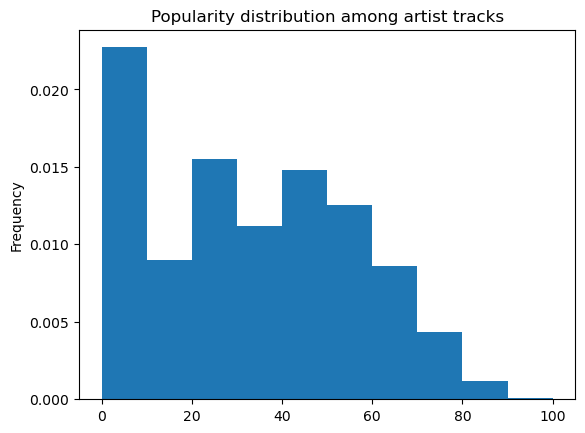

In [14]:
popularity.popularity.plot(kind='hist', density=True, title='Popularity distribution among artist tracks')

The histogram illustrates the distribution of an artist’s track popularity scores, revealing that most tracks fall into the lower popularity range (0–10), with a noticeable secondary cluster around the 20–30 range. As the popularity score increases beyond 40, the frequency of tracks gradually declines, with very few reaching the highest popularity levels. This right-skewed distribution suggests that while the artist has many tracks, only a small portion achieve significant popularity, reflecting a common pattern where a few hits stand out while the majority remain less well-known.

#### 2. Demography

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


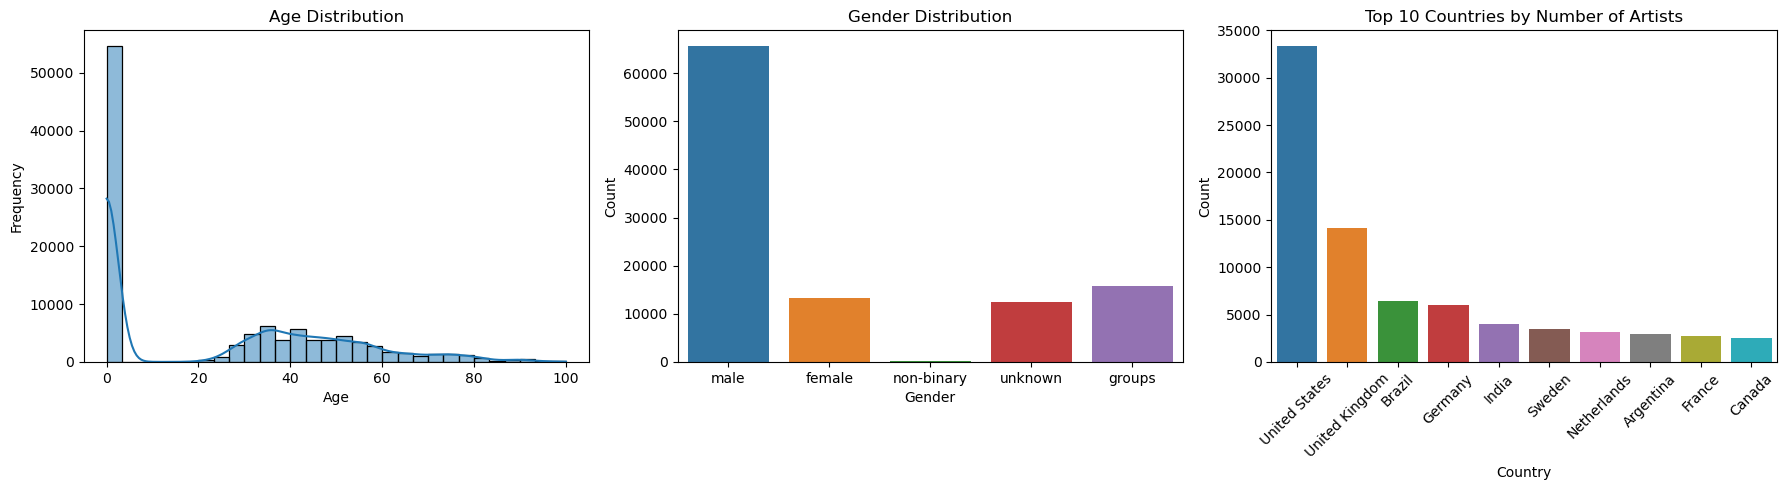

In [20]:
demographic_copy = artists_final[['artists', 'track_name', 'gender', 'age', 'country']].copy()
demographic_copy['region'] = demographic_copy.country.apply(country_to_region)
demographic_copy['age'] = demographic_copy.age.apply(quantify_age)

# Set plot style
plt.style.use('default')
plt.figure(figsize=(18, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(demographic_copy['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender distribution
plt.subplot(1, 3, 2)
sns.countplot(x='gender', data=demographic_copy)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Top 10 countries distribution
plt.subplot(1, 3, 3)
top_countries = demographic_copy['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Artists')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The age distribution plot reveals that a significant number of artists have an age value near zero, which represents deceased artists. Aside from them, there is a more realistic concentration of artists in the age range between 20 and 60, with the highest density appearing around the mid-30s to mid-40s. The distribution tapers off toward older ages, indicating that most active artists are relatively young or middle-aged, which aligns with typical industry trends.

The gender distribution is highly imbalanced, with male artists making up the majority of the dataset. Female artists are present in much smaller numbers, and there are also noticeable categories for groups and unknown genders. The presence of non-binary artists is minimal. This highlights either an industry-wide disparity in representation or potential limitations in how gender data was collected or recorded.

Finally, the country distribution is heavily skewed, with the United States dominating the artist population by a large margin. Following the U.S., the United Kingdom and Brazil contribute significantly but still far less in comparison. Other countries like Germany, India, Sweden, and several European nations are present but with lower representation. This pattern suggests that the dataset is concentrated around major music markets and English-speaking countries, with smaller contributions from other regions.

#### Musical data

C:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


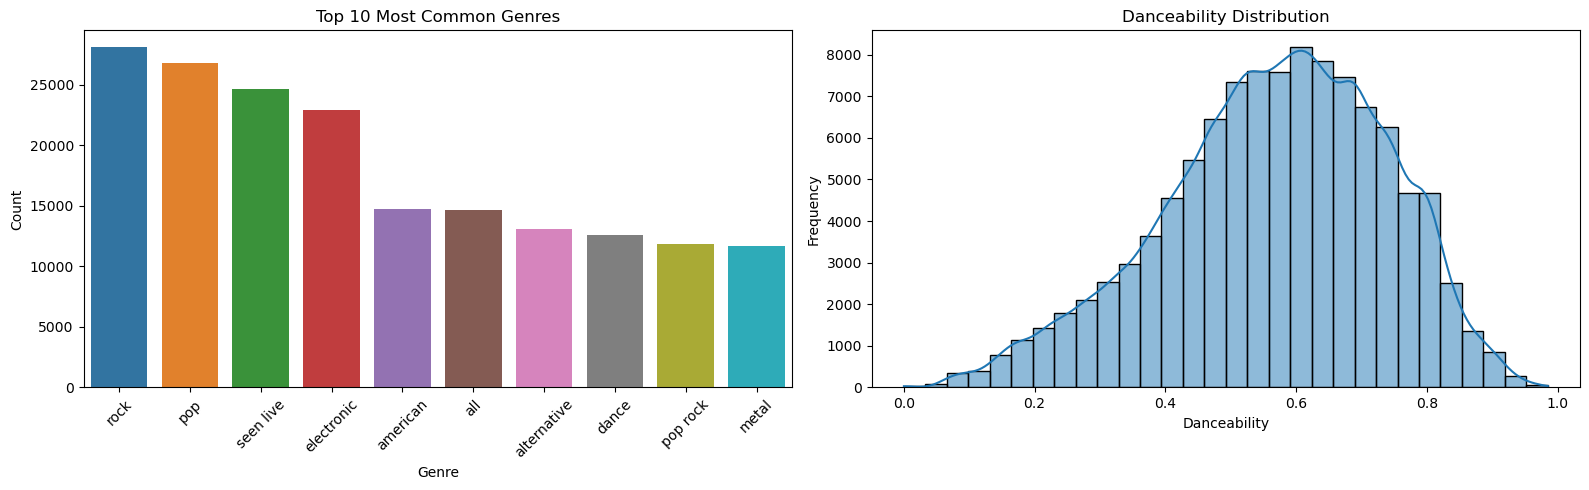

In [26]:
# Get top 10 genres
all_genres = [genre for sublist in genre_lists for genre in sublist]
genre_counts = Counter(all_genres)
top_10_genres = genre_counts.most_common(10)
genre_df = pd.DataFrame(top_10_genres, columns=['genre', 'count'])

# Plot both distributions
plt.figure(figsize=(16, 5))

# Genre distribution plot
plt.subplot(1, 2, 1)
sns.barplot(data=genre_df, x='genre', y='count')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Danceability distribution plot
plt.subplot(1, 2, 2)
sns.histplot(musical['danceability'], bins=30, kde=True)
plt.title('Danceability Distribution')
plt.xlabel('Danceability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The first plot shows the distribution of the top 10 most common genres in the dataset. Rock is the most frequently occurring genre, followed closely by pop and electronic, reflecting the dominance of popular, mainstream music styles. Interestingly, the presence of tags like "seen live" and "american" indicates that not all tags are strictly musical genres — some are descriptive of performance or artist origin. Other notable genres in the top 10 include alternative, dance, pop rock, and metal, suggesting the dataset covers a wide range of musical styles, with an emphasis on energetic and widely appealing categories.

The second plot displays the distribution of danceability scores across all tracks. The distribution is roughly bell-shaped, peaking around a value of 0.6, meaning that most songs are moderately danceable. There is a balanced spread on either side of this peak, showing that while some tracks are less suited for dancing (closer to 0.2–0.3), and others are highly danceable (closer to 0.8), the majority lie comfortably in the middle range. This pattern indicates the dataset includes a diverse variety of music in terms of rhythm and beat suitability for dancing, but with a tendency toward moderately danceable tracks rather than extremes.

### Methodology
We conducted separate predictive analyses for each category using Logistic Regression and Support Vector Machines (SVM), evaluating which factor best predicts artist collaboration.

### Results and Interpretation

#### Popularity Analysis
Performance metrics using popularity data:

- Precision: ~55%
- Recall: ~55%
- F1-score: ~55%

These results indicate a moderate capability of popularity to predict collaboration.

#### Demographic Analysis
Performance metrics using musical style data:

- Precision: ~58%
- Recall: ~58%
- F1-score: ~58%

Demographic data slightly outperformed popularity, indicating demographic characteristics (age, gender, nationality) provide stronger predictive insights into collaboration.

#### Musical Style Analysis
Performance metrics using musical style data:

- Precision: ~54%
- Recall: ~54%
- F1-score: ~53%

Musical style showed a moderate but slightly lower predictive ability compared to demographic and popularity factors, suggesting that musical similarity alone is less predictive than initially expected.

In [ ]:
def generate_artist_pairs(df):
    popularity_lookup = df.set_index('artists')['popularity'].to_dict()

    collaborations = df.groupby('track_name')['artists'].apply(list).reset_index()

    positive_pairs = set()
    for artists in collaborations['artists']:
        if len(artists) > 1:
            for i in range(len(artists)):
                for j in range(i+1, len(artists)):
                    pair = tuple(sorted([artists[i], artists[j]]))
                    positive_pairs.add(pair)

    positive_pairs_df = pd.DataFrame(list(positive_pairs), columns=['artist_1', 'artist_2'])
    positive_pairs_df['collaboration'] = 1

    all_artists = df['artists'].unique().tolist()
    positive_pairs_set = set(tuple(sorted([row.artist_1, row.artist_2])) for row in positive_pairs_df.itertuples())

    negative_pairs = set()
    while len(negative_pairs) < len(positive_pairs):
        artist_1, artist_2 = random.sample(all_artists, 2)
        pair = tuple(sorted([artist_1, artist_2]))
        if pair not in positive_pairs_set:
            negative_pairs.add(pair)

    negative_pairs_df = pd.DataFrame(list(negative_pairs), columns=['artist_1', 'artist_2'])
    negative_pairs_df['collaboration'] = 0

    pairs_df = pd.concat([positive_pairs_df, negative_pairs_df], ignore_index=True)

    pairs_df['artist_1_popularity'] = pairs_df['artist_1'].map(popularity_lookup)
    pairs_df['artist_2_popularity'] = pairs_df['artist_2'].map(popularity_lookup)
    X = pairs_df[['artist_1_popularity', 'artist_2_popularity']].fillna(0)
    y = pairs_df['collaboration']
    return X, y
    
X, y = generate_artist_pairs(popularity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)
report = classification_report(y_test, predictions, zero_division=0)
print(report)

In [ ]:
def generate_artist_pairs_with_demographic(df):
    df_unique = df.drop_duplicates(subset=['artists']).copy()
    demographic_lookup = df_unique.set_index('artists').to_dict(orient='index')

    collaborations = df.groupby('track_name')['artists'].apply(list).reset_index()

    positive_pairs = set()
    for artists in collaborations['artists']:
        if len(artists) > 1:
            for i in range(len(artists)):
                for j in range(i+1, len(artists)):
                    pair = tuple(sorted([artists[i], artists[j]]))
                    positive_pairs.add(pair)

    positive_pairs_df = pd.DataFrame(list(positive_pairs), columns=['artist_1', 'artist_2'])
    positive_pairs_df['collaboration'] = 1

    all_artists = df_unique['artists'].unique().tolist()
    positive_pairs_set = set(tuple(sorted([row.artist_1, row.artist_2])) for row in positive_pairs_df.itertuples())

    negative_pairs = set()
    while len(negative_pairs) < len(positive_pairs):
        artist_1, artist_2 = random.sample(all_artists, 2)
        pair = tuple(sorted([artist_1, artist_2]))
        if pair not in positive_pairs_set:
            negative_pairs.add(pair)

    negative_pairs_df = pd.DataFrame(list(negative_pairs), columns=['artist_1', 'artist_2'])
    negative_pairs_df['collaboration'] = 0

    pairs_df = pd.concat([positive_pairs_df, negative_pairs_df], ignore_index=True)

    for col in df_unique.columns:
        if col not in ['artists', 'track_name']:
            pairs_df[f'artist_1_{col}'] = pairs_df['artist_1'].map(lambda x: demographic_lookup[x].get(col, np.nan))
            pairs_df[f'artist_2_{col}'] = pairs_df['artist_2'].map(lambda x: demographic_lookup[x].get(col, np.nan))

    return pairs_df

demographic_pairs_df = generate_artist_pairs_with_demographic(demographic)

demographic_numeric_cols = [col for col in demographic_pairs_df.columns if col.startswith('artist_') and demographic_pairs_df[col].dtype in [np.float64, np.int64]]
X_demographic = demographic_pairs_df[demographic_numeric_cols].fillna(0)
y_demographic = demographic_pairs_df['collaboration']

X_train_demographic, X_test_demographic, y_train_demographic, y_test_demographic = train_test_split(X_demographic, y_demographic, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_demographic, y_train_demographic)
demographic_predictions = svm_model.predict(X_test_demographic)
demographic_report = classification_report(y_test_demographic, demographic_predictions, zero_division=0)
print(demographic_report)

In [ ]:
def generate_artist_pairs_with_musical(df):
    df_unique = df.drop_duplicates(subset=['artists']).copy()
    musical_lookup = df_unique.set_index('artists').to_dict(orient='index')

    collaborations = df.groupby('track_name')['artists'].apply(list).reset_index()

    positive_pairs = set()
    for artists in collaborations['artists']:
        if len(artists) > 1:
            for i in range(len(artists)):
                for j in range(i+1, len(artists)):
                    pair = tuple(sorted([artists[i], artists[j]]))
                    positive_pairs.add(pair)

    positive_pairs_df = pd.DataFrame(list(positive_pairs), columns=['artist_1', 'artist_2'])
    positive_pairs_df['collaboration'] = 1

    all_artists = df_unique['artists'].unique().tolist()
    positive_pairs_set = set(tuple(sorted([row.artist_1, row.artist_2])) for row in positive_pairs_df.itertuples())

    negative_pairs = set()
    while len(negative_pairs) < len(positive_pairs):
        artist_1, artist_2 = random.sample(all_artists, 2)
        pair = tuple(sorted([artist_1, artist_2]))
        if pair not in positive_pairs_set:
            negative_pairs.add(pair)

    negative_pairs_df = pd.DataFrame(list(negative_pairs), columns=['artist_1', 'artist_2'])
    negative_pairs_df['collaboration'] = 0

    pairs_df = pd.concat([positive_pairs_df, negative_pairs_df], ignore_index=True)

    for col in df_unique.columns:
        if col not in ['artists', 'track_name']:
            pairs_df[f'artist_1_{col}'] = pairs_df['artist_1'].map(lambda x: musical_lookup[x].get(col, np.nan))
            pairs_df[f'artist_2_{col}'] = pairs_df['artist_2'].map(lambda x: musical_lookup[x].get(col, np.nan))

    return pairs_df

musical_pairs_df = generate_artist_pairs_with_musical(discography_df)

musical_numeric_cols = [col for col in musical_pairs_df.columns if col.startswith('artist_') and musical_pairs_df[col].dtype in [np.float64, np.int64]]
X_musical = musical_pairs_df[musical_numeric_cols].fillna(0)
y_musical = musical_pairs_df['collaboration']

X_train_musical, X_test_musical, y_train_musical, y_test_musical = train_test_split(X_musical, y_musical, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_musical, y_train_musical)

predictions = svm_model.predict(X_test_musical)
musical_report = classification_report(y_test_musical, predictions, zero_division=0)
print(musical_report)

### Comparative Analysis
Comparing the predictive performance across all three data categories:

- Popularity: Moderate predictive power (~55%)
- Demographics: Slightly higher predictive power (~58%)
- Musical style: Slightly lower predictive power (~54%)

Contrary to our initial hypothesis, demographic factors were slightly more influential in predicting artist collaborations than popularity.

# Ethics & Privacy

Although the music artists analyzed are all more or less famous celebrities in the public eye, there are still concerns surrounding data privacy that we kept in mind for this project. In particular, it is possible that there is publicly available information about an artist which that artist does not want to be available. For this reason, it is important to check whether artists have consented for the data we are using to be released to the public, and if not we should avoid using that data. Fortunately, the artist information we are interested in originates from whatever information the artists have released to the public themselves, such as their name, age, gender, their songs, and their country of origin if they have specified it.

One potential form of bias in our data sets would be a lack of representation of artists who are up-and-coming or otherwise not as popular as others. Naturally, more popular artists have likely 1) had more time to participate in more collaborations, and 2) have a greater network of connections in the industry which further facilitates collaborations. While we remain aware of this shortcoming, it is not feasible to correct for it since we may only go off of data that is available to us in the first place; we cannot force unknown artists to have readily available data to be analyzed.

The greatest ethical concern for this project is the potential reinforcement of harmful cultural stereotypes. Given that part of the research question seeks to understand how social identity factors impact music collaborations, it is possible that the conclusions of the analysis have implicitly outlined issues of segregation and/or discrimination in general. For this reason, throughout the project we have never translated superficial data associations into dangerous cultural attitudes like an "us vs. them" mentality. Our analysis successfully avoided drawing such generalizations, and there is nothing in the analysis that would validate stereotypical attitudes.

# Discussion and Conclusion

We started with the question of what factors are most important in determining whether or not artists might collaborate to make music. We narrowed our focus to three specific categories of factors: demographic (age, gender, nationality), popularity (measured as listenership), and musical stlye (captured as genre and the 'danceabiltiy' of their music). Background research revealed prior work on this topic, which had demonstrated connections between collaboration and popularity and social identity markers. We sought to elaborate on this research by seeing just how informative these types of factors are relative to one another. We came up with the hypothesis that the popularity of artists' would be the strongest determining factor of whether or not a pair of artists would collaborate, the rationale being that artists would prefer working within their 'rank' in the industry.

To test our hypothesis, we found the Spotify Tracks and Music Artist Popularity datasets to compile a set of artists along with their genre, danceability, lastfm listenership, and nationality, while we retrieved additional demographic information in the form of age and gender with the aid of Mistral AI. Once we cleaned all the datasets to obtain artist profiles complete with their demographics, popularity, and musical style factors, we were ready to perform our analysis.

To compare the predictive strength of our three categories, we trained three different SVM classification models on the respective feature types. Once trained we compared the models' accuracy in predicting whether or not randomized pairs of artists have collaborated or not. In the end, the demographics model was 58% accurate, the popularity model was 55% accurate, and the musical style model was 54% accurate. It would seem based on these results that demographic factors are slightly stronger predictors than either of artist popularity or musical style. However, it is important to note that the observed accuracies are only marginally different, and all are quite close to 50/50 odds. From this standpoint, it seems that really none of the three categories are overly strong on their own.

We have a few takeaways from this project. First, it is difficult to predict whether a pair of artists would collaborate or not. When it comes down to it, any number of factors can lead artists to choose to collaborate or not, and it's not surprising that three simple categories of factors did not necessarily do a good job of predicting. There are certainly drawbacks to the way we went about our analysis. It is often not clear what is the best way to compare qualitative information such as demographics against quantitative information such as listenership. In the case of this project we settled on word sentiment analysis and assigning demographic categories to specified indices for the sake of quantifying the qualitative. Had we chosen different means of comparing across these types of data, the results of the analysis may have been different.

# Team Contributions

- Misha Tavera: Background and Prior Work
- Matthew Paoletta: Dataset definitions, Variable Importance, Final Video
- Jun-Hee Hwang: Data overview, cleaning, exploration, analysis
- Will Lang: Research Question, Hypothesis, Ethics & Privacy section